<a href="https://colab.research.google.com/github/parr129/Nobel_price/blob/main/Nobel_Prize_Winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. The Most Prestigious Prize of All
 <p>Since its inception in 1901, the Nobel Prize has stood as one of the most prestigious honors in science, literature, and peace. While the early awards were notably Eurocentric and male-dominated, the question remains—has this trend shifted in more recent years?</p> <p>Fortunately, the Nobel Foundation has released a dataset that spans over a century, from 1901 to 2016. With this data, we can explore how the awarding of Nobel Prizes has evolved across countries, categories, and demographics. Let's take a closer look!</p>

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


nobel = pd.read_csv("/content/nobel.csv")

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [ ]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
len(nobel.index)

911

In [ ]:
# Display the number of prizes won by male and female recipients.
nobel["sex"].value_counts()

,count
sex,
Male,836
Female,49


In [ ]:
# Display the number of prizes won by the top 10 nationalities.
nobel["birth_country"].value_counts().head(10)

,count
birth_country,
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
Japan,24
Netherlands,18
Canada,18
Russia,17


## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European.</p>
<p>
When did the USA start to dominate the Nobel Prize charts?</p>

In [ ]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade",as_index=False)["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners.head()

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

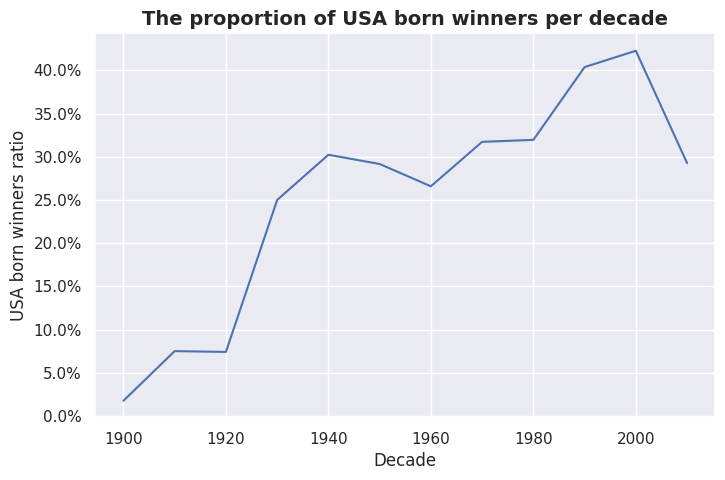

In [ ]:
# Setting the plotting theme and setting the size of all plots.
sns.set()
plt.rcParams['figure.figsize'] = [8, 5]

# Plotting USA born winners
ax = sns.lineplot(x="decade" ,y="usa_born_winner", data=prop_usa_winners)

# Adding axes' labels and title
plt.title("The proportion of USA born winners per decade",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("USA born winners ratio")
plt.xlabel("Decade")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

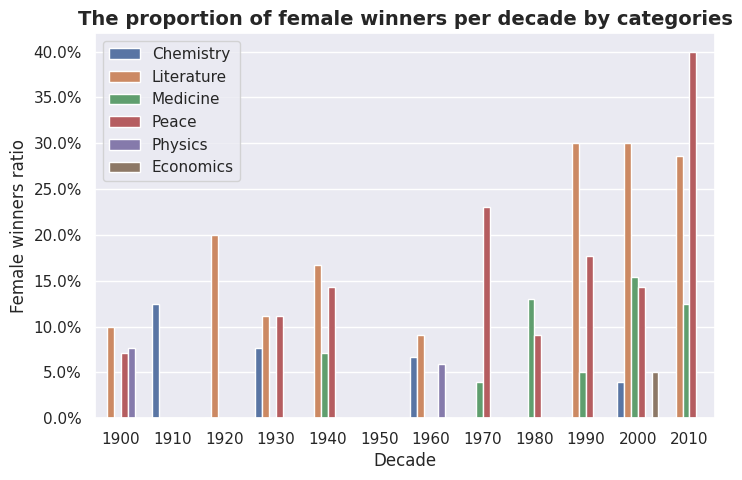

In [ ]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"]=="Female"
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()

# Plotting female winners
ax = sns.barplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)

# Adding axes' labels, title and legend
plt.title("The proportion of female winners per decade by categories",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Female winners ratio")
plt.xlabel("Decade")
plt.legend(loc='upper left')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<p>Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p> Let's see the imbalance between the number of female and male winners by dividing them into age groups and calculating the distribution ratio. And visualize this data!</p>

In [ ]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel.birth_date)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel['birth_date'].dt.year

# Creating age categories
bins = [nobel["age"].min()-1,29,39,49,59,69,79,nobel["age"].max()]
label = ["<-29","30-39","40-49","50-59","60-69","70-79","80+"]
nobel["age_interval"] = pd.cut(nobel["age"], bins=bins, labels = label)

# Total number of winners
total = float(len(nobel))

# Grouping winners by age interval and sex
nobel_age_interval = nobel.groupby(["sex","age_interval"])["laureate_id"].count()
nobel_age_interval = pd.DataFrame(nobel_age_interval).reset_index()
nobel_age_interval.columns = ["sex","age_interval","number_of_winners"]

# Calculation of the distribution ratio by age interval and sex
nobel_age_interval["ratio"] = round((nobel_age_interval["number_of_winners"]/total)*100,2)
nobel_age_interval.head()

,sex,age_interval,number_of_winners,ratio
0,Female,<-29,1,0.11
1,Female,30-39,7,0.77
2,Female,40-49,6,0.66
3,Female,50-59,13,1.43
4,Female,60-69,8,0.88


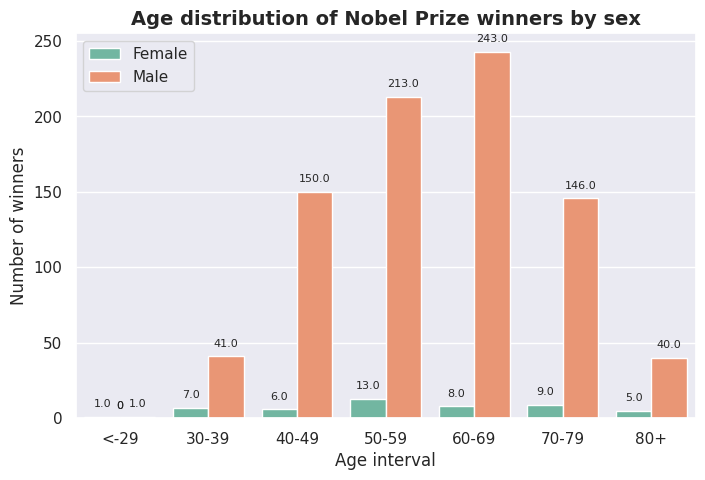

In [ ]:
# Plotting the age distribution of Nobel Prize winners by sex
ax = sns.barplot(x="age_interval", y="number_of_winners",
                 hue="sex",
                 data=nobel_age_interval,
                 palette="Set2")

# Bin label/text
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha = 'center', va = 'center', size=8,
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Adding axes' labels, title and legend
plt.title("Age distribution of Nobel Prize winners by sex",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Number of winners")
plt.xlabel("Age interval")
plt.legend(loc='upper left')
plt.show()

## 6. The first woman to win the Nobel Prize
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [ ]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel["sex"]=="Female"].nsmallest(1, columns="year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age,age_interval
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0,30-39


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these few people?</p>

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
columns = nobel[["full_name","year","category","laureate_id","sex","prize"]]
two_times_winners = columns.groupby("full_name").filter(lambda group: len(group) >= 2).sort_values("laureate_id")
two_times_winners.head(6)

,full_name,year,category,laureate_id,sex,prize
19,"Marie Curie, née Sklodowska",1903,Physics,6,Female,The Nobel Prize in Physics 1903
62,"Marie Curie, née Sklodowska",1911,Chemistry,6,Female,The Nobel Prize in Chemistry 1911
298,John Bardeen,1956,Physics,66,Male,The Nobel Prize in Physics 1956
424,John Bardeen,1972,Physics,66,Male,The Nobel Prize in Physics 1972
340,Linus Carl Pauling,1962,Peace,217,Male,The Nobel Peace Prize 1962
278,Linus Carl Pauling,1954,Chemistry,217,Male,The Nobel Prize in Chemistry 1954


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! But how old are you generally when you get the prize?</p>

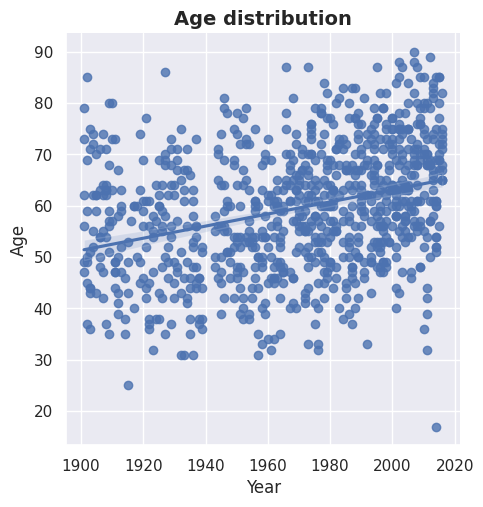

In [ ]:
# Plotting the age of Nobel Prize winners
ax = sns.lmplot(x="year", y="age", data=nobel)
plt.rcParams['figure.figsize'] = [8, 5]

# Adding axes' labels, title and legend
plt.title("Age distribution",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Age")
plt.xlabel("Year")
plt.show()

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

In [ ]:
# Same plot as above, but separate plots for each type of Nobel Prize
ax = sns.lmplot("year", "age", data=nobel,
                hue="category",
                col="category",
                col_wrap=3)
plt.show()

More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time.
* The trend is strongest for physics: the average age used to be below 50, and now it's almost 70.
* Literature and economics are more stable. We also see that economics is a newer category.
* But peace shows an opposite trend where winners are getting younger!

## 10. Oldest and youngest winners
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [ ]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
display(nobel.nsmallest(1, 'age'))

# 11. How long did it take for each country to win its first Nobel Prize?

Understanding when each country first won a Nobel Prize reveals how scientific and cultural recognition spread globally over time.

birth_country
France                     1901
Prussia (Germany)          1901
Prussia (Poland)           1901
Netherlands                1901
Switzerland                1901
India                      1902
Schleswig (Germany)        1902
Faroe Islands (Denmark)    1903
Norway                     1903
Russian Empire (Poland)    1903
Name: year, dtype: int64


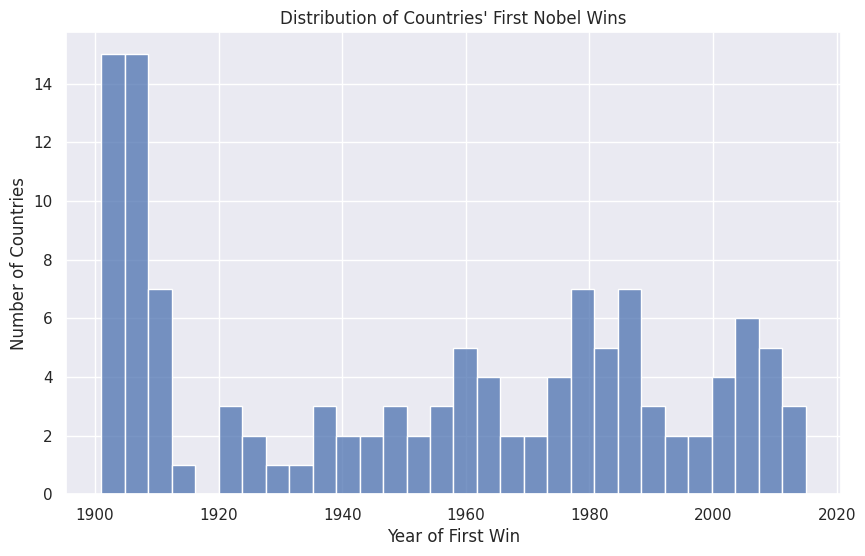

In [ ]:
# Finding the year of first Nobel win for each country
first_win = nobel.groupby('birth_country')['year'].min().sort_values()

# Display the top 10 countries by earliest first win
print(first_win.head(10))

# Visualizing
plt.figure(figsize=(10,6))
sns.histplot(first_win.values, bins=30, kde=False)
plt.title("Distribution of Countries' First Nobel Wins")
plt.xlabel("Year of First Win")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.show()


# 12. What’s the gender breakdown within each category over time?

This shows how gender diversity has progressed within each Nobel Prize category across decades.

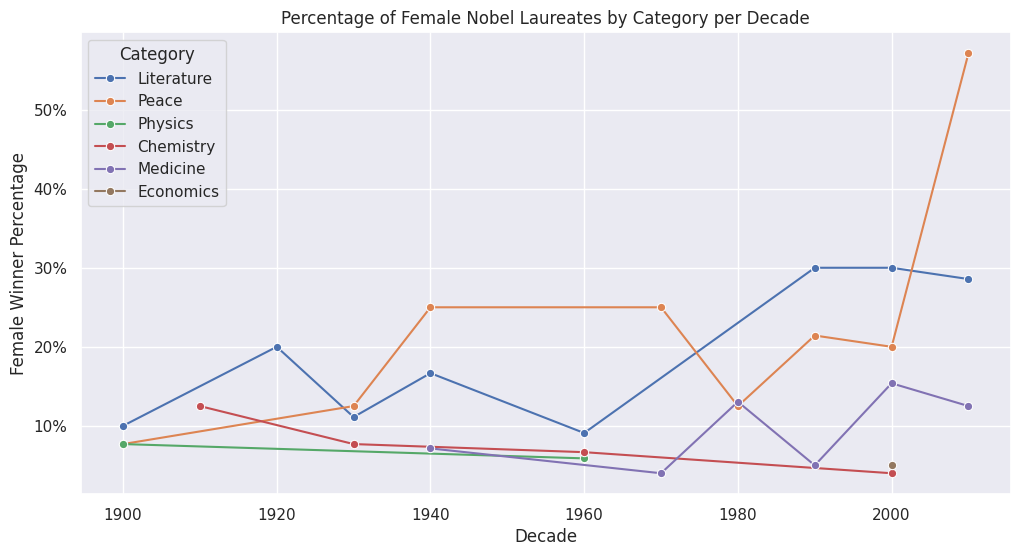

In [ ]:
# Gender count per decade and category
gender_cat_trend = nobel.groupby(['decade', 'category', 'sex']).size().reset_index(name='count')

# Total laureates per category and decade for percentage
gender_cat_total = gender_cat_trend.groupby(['decade', 'category'])['count'].transform('sum')
gender_cat_trend['percent'] = gender_cat_trend['count'] / gender_cat_total

# Plotting the percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_cat_trend[gender_cat_trend['sex'] == 'Female'],
             x='decade', y='percent', hue='category', marker="o")

plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Percentage of Female Nobel Laureates by Category per Decade")
plt.xlabel("Decade")
plt.ylabel("Female Winner Percentage")
plt.legend(title="Category")
plt.grid(True)
plt.show()


# 13. Do female winners tend to be younger or older than their male counterparts?

This comparison reveals if women win the Nobel at different ages than men, perhaps due to structural or cultural delays in recognition.

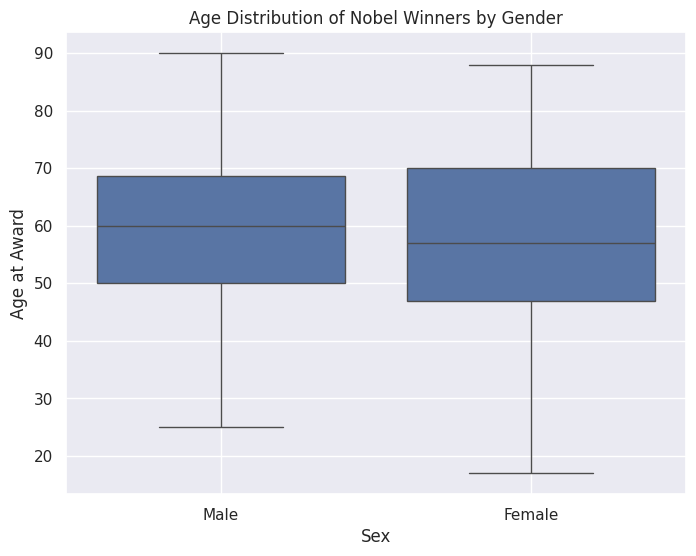

In [ ]:
# Visualizing age by sex
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='age', data=nobel)
plt.title("Age Distribution of Nobel Winners by Gender")
plt.xlabel("Sex")
plt.ylabel("Age at Award")
plt.grid(True)
plt.show()


# 14. How many women have won more than once?

While multiple wins are rare, this will help highlight exceptional achievements by women.

In [ ]:
# Count number of times each laureate has won
win_counts = nobel[nobel['sex'] == 'Female'].groupby('full_name').size()

# Filter those who won more than once
female_repeat_winners = win_counts[win_counts > 1]

# Display
print("Female winners who won more than once:")
print(female_repeat_winners)

# You can also display their rows
nobel[nobel['full_name'].isin(female_repeat_winners.index)]


Female winners who won more than once:
full_name
Marie Curie, née Sklodowska    2
dtype: int64


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age,age_interval
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0,30-39
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Paris,France,1934-07-04,Sallanches,France,False,1910,True,44.0,40-49


| **Aspect**                  | **Key Insight**                                                               |
| --------------------------- | ----------------------------------------------------------------------------- |
| 🇺🇸 **Country Dominance**  | USA became dominant post-1930s; significant brain drain observed.             |
| 🚻 **Gender Disparity**     | \~95% of winners are male; gaps persist in Physics, Chemistry, Economics.     |
| 🎂 **Age Trends**           | Average winner's age has increased; many now awarded in their 60s or older.   |
| 👥 **Prize Sharing**        | More shared prizes in recent decades due to collaborative research efforts.   |
| 🌍 **Global Participation** | Country diversity is rising, but wealthy nations still lead in total awards.  |
| 🌟 **Exceptional Cases**    | Few laureates (e.g. Marie Curie) won multiple prizes across different fields. |
